# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing my libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing my libraries and data

In [2]:
conda install quandl`

Channels:
Note: you may need to restart the kernel to use updated packages.

 - defaults
Platform: win-64
Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - quandl`

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [9]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how my plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [18]:
# Configure API key 

quandl.ApiConfig.api_key = 'fQkch8o9kpMKmtoyPwfv'

In [19]:
# Importing the Federal Reserve Economic Data "Gross Domestic Product" variable.

data = quandl.get('FRED/GDP')

In [20]:
data.head(5)

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [21]:
data.shape

(300, 1)

In [22]:
data.columns

Index(['Value'], dtype='object')

In [23]:
type(data)

pandas.core.frame.DataFrame

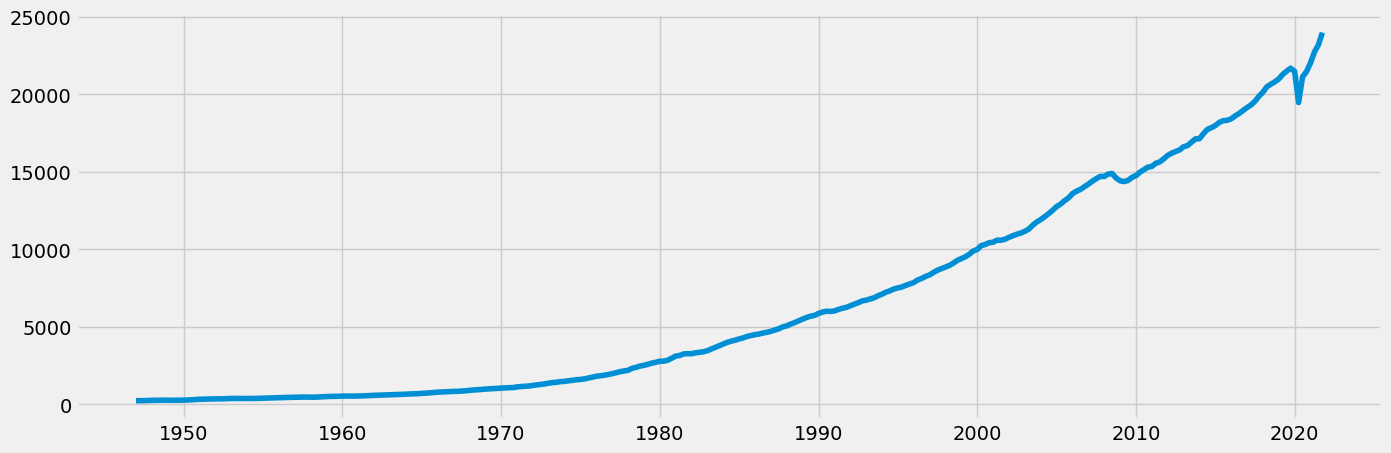

In [24]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(data)

## 2. Subsetting, wrangling, and cleaning time-series data

In [25]:
# Reset index so that i can use the "Date" column as a filter

data_2 = data.reset_index()

In [26]:
data_2.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [27]:
data_sub = data_2.loc[(data_2['Date'] >= '1990-01-01') & (data_2['Date'] < '2020-02-01')]

In [28]:
data_sub.shape

(121, 2)

In [31]:
data_sub.head(20)

,Date,Value
172,1990-01-01,5872.701
173,1990-04-01,5960.028
174,1990-07-01,6015.116
175,1990-10-01,6004.733
176,1991-01-01,6035.178
177,1991-04-01,6126.862
178,1991-07-01,6205.937
179,1991-10-01,6264.540
180,1992-01-01,6363.102
181,1992-04-01,6470.763


In [32]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1990-01-01,5872.701
1990-04-01,5960.028
1990-07-01,6015.116
1990-10-01,6004.733
1991-01-01,6035.178


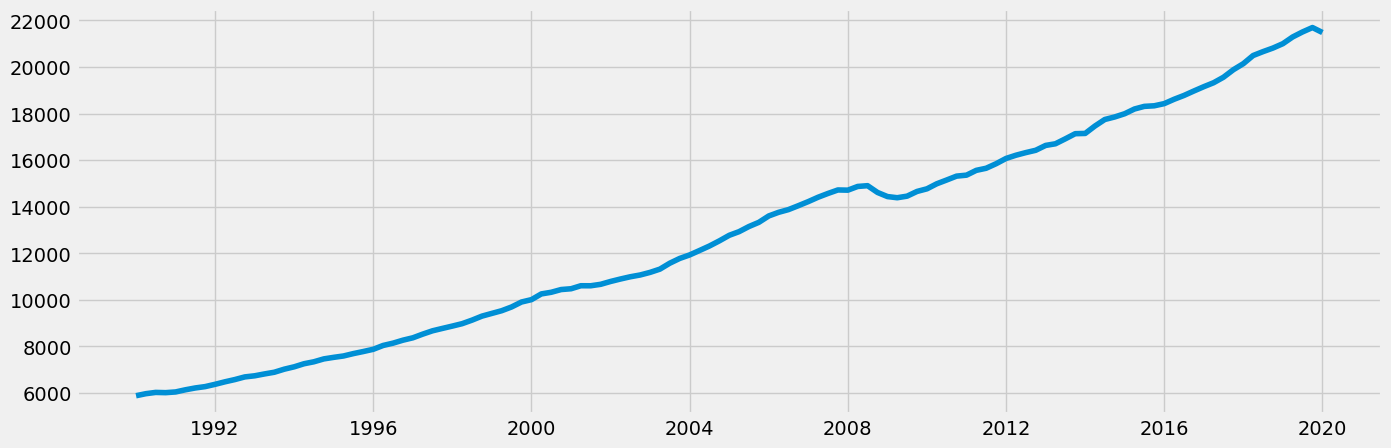

In [33]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [36]:
# Check for missing values 

data_sub.isnull().sum() 

Value    0
dtype: int64

In [37]:
#### no missing values 

In [38]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

## 3. Time series analysis: decomposition

In [39]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [40]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

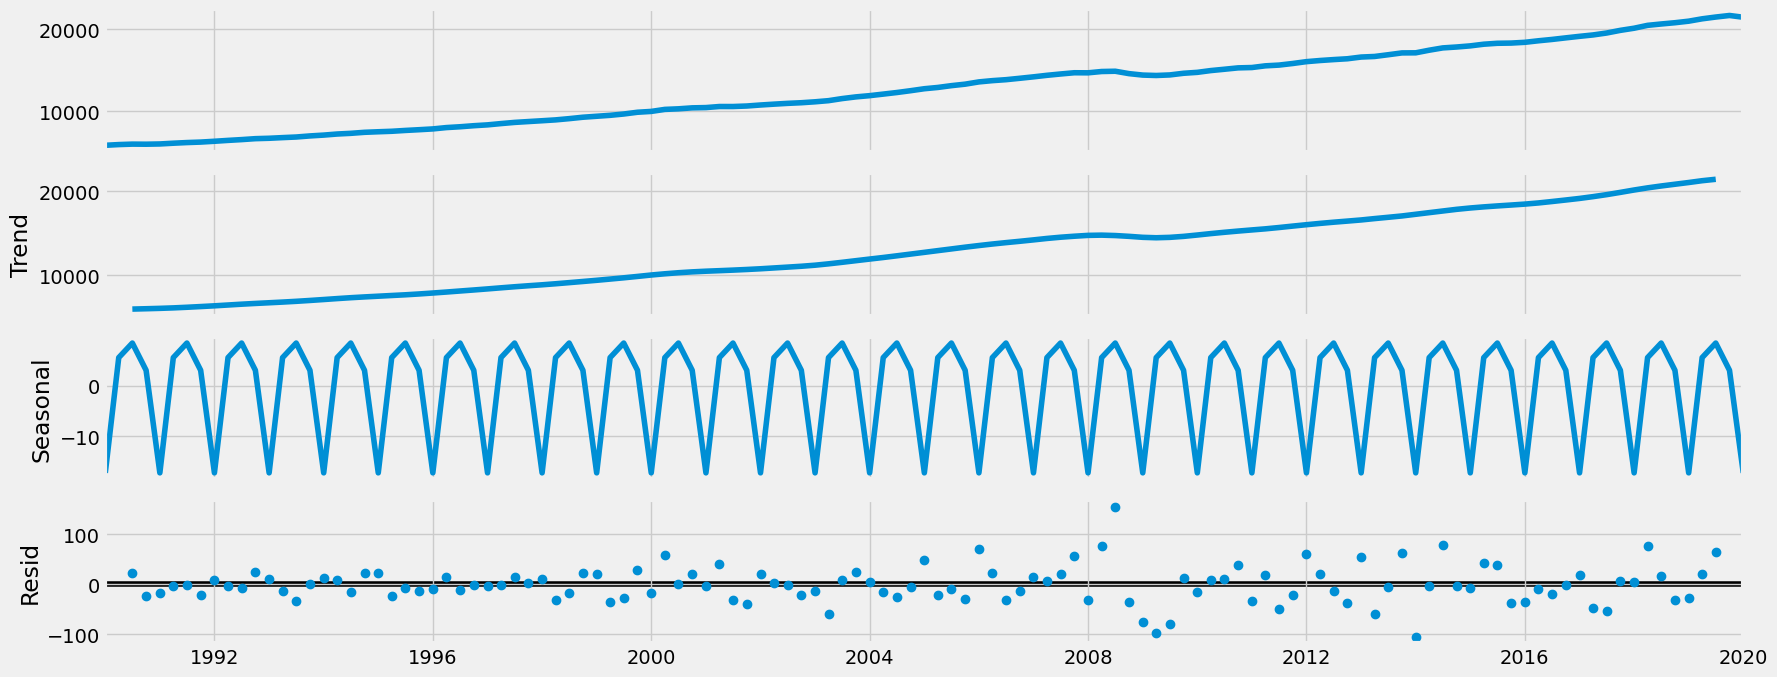

In [41]:
# Plot the separate components

decomposition.plot()
plt.show()

##### Looking at the plot, the trend chart gradually jump or move up in linear from 1990 and then drops a little bit around 2009 due to global economic recession and jump again from 2010 to 2020. This trend shows positive in the U.S. market value of all the final goods and services produced in the U.S. between 1990 to 2020

## 4. Testing for stationarity

In [42]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.266697
p-value                          0.996416
Number of Lags Used              1.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


###### The Dicky Fuller test shows that time series are non-stationary
 ###### P-Value is 0.996416 which is more than 0.05. Therfore, the test result is non signifacant.
 ###### Critical Value (10%) -2.579896 bigger than Test Statistic  1.266697

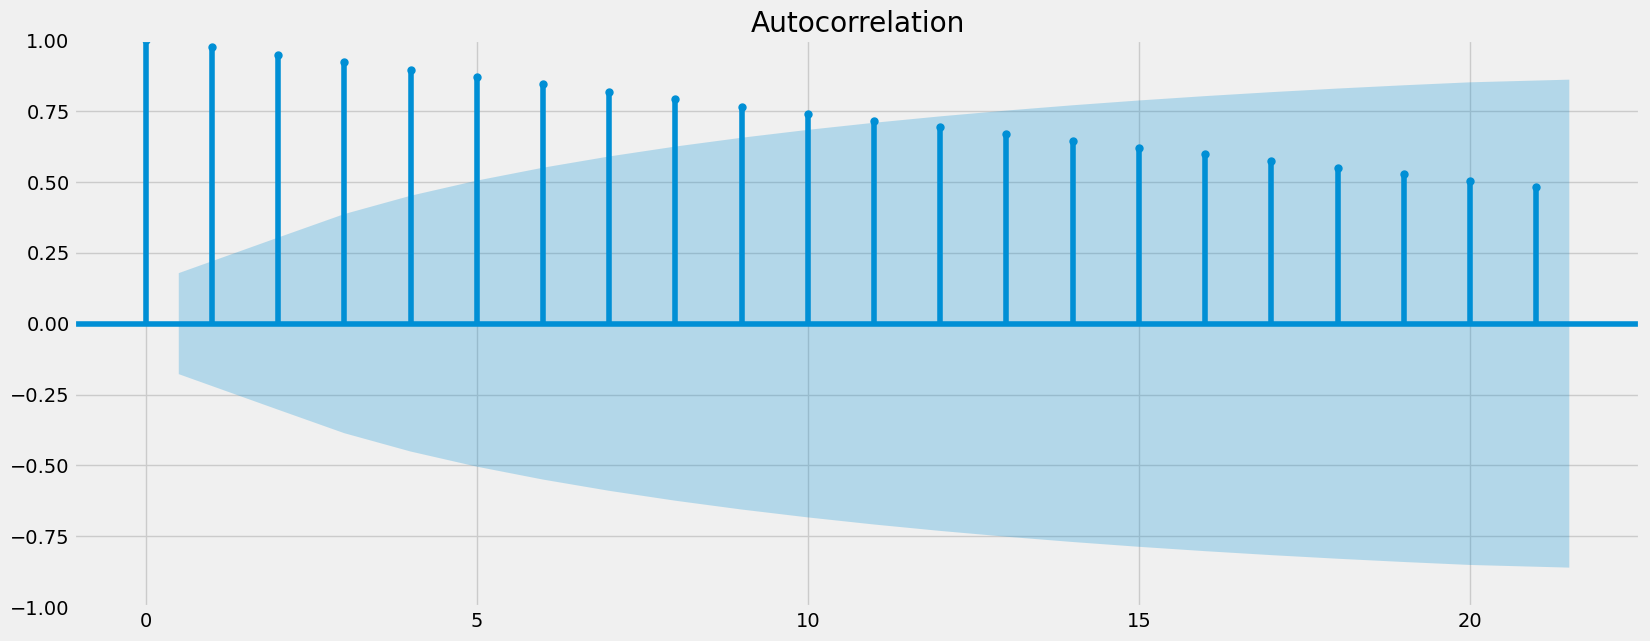

In [43]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

##### Looking at the autocorrelation plot above, it shows that i have many lags beyond the confidence interval. This indicates that my data is non stationary to support the Dickey Fuller's test

## 5. Stationarizing the Federal Reserve Economic Data

In [44]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [45]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [46]:
data_diff.head()

,Value
datetime,
1990-04-01,87.327
1990-07-01,55.088
1990-10-01,-10.383
1991-01-01,30.445
1991-04-01,91.684


In [47]:
data_diff.columns

Index(['Value'], dtype='object')

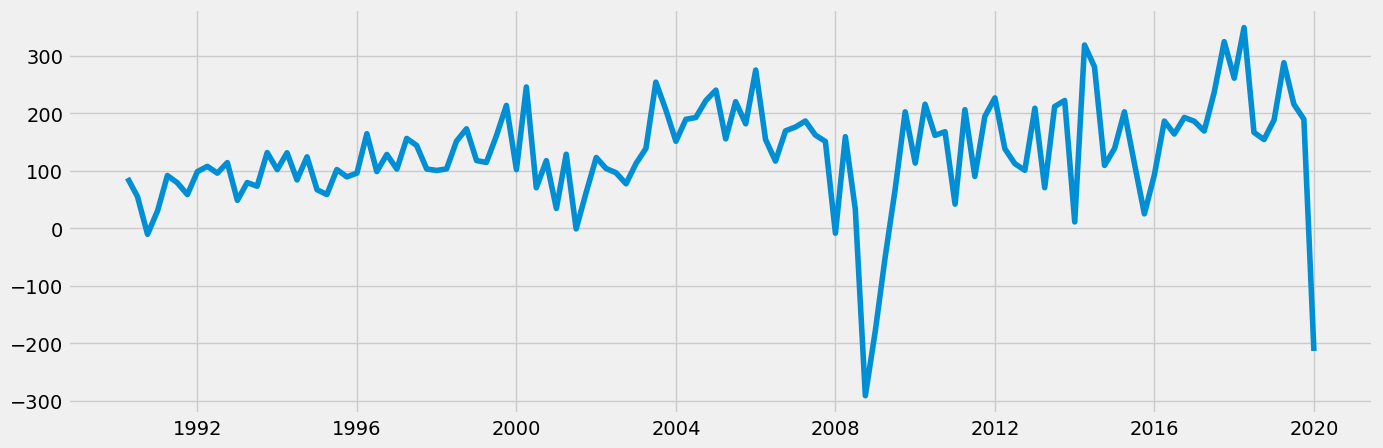

In [48]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [49]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.930629e+00
p-value                        2.385364e-07
Number of Lags Used            0.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64


##### After stationarising GDP time series, it shows that test statistic is now smaller than both 10% and 5% critical value. This means i can reject null hypothesis and i can consider GDP data series stationary 

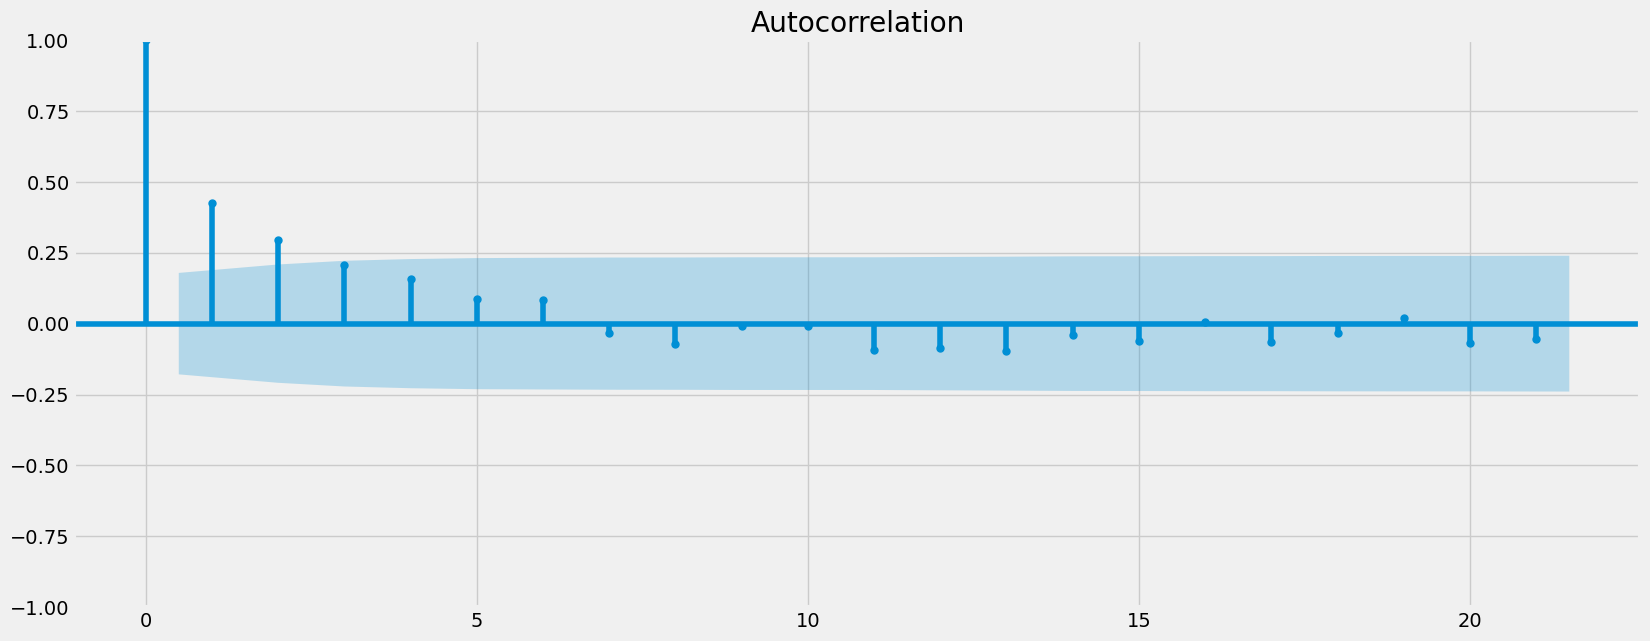

In [50]:
plot_acf(data_diff)
plt.show()

##### Autocorrelation seems to have improved, but still doesn't look perfect because there are fewer autocorrelated terms. This means that stationarity is still weak and not fully stationary as Dickey Fuller's test had shown